In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/shreyas219/datasets/main/Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [9]:
X = df.iloc[:, 1:4]
y = df.iloc[:,-1]

### Converting Gender into binary format by OneHotEncoder

In [10]:
from sklearn.preprocessing import OneHotEncoder
on = OneHotEncoder()
on.fit(X['Gender'].values.reshape(-1,1))

OneHotEncoder()

In [11]:
X_gender = on.transform(X['Gender'].values.reshape(-1,1)).toarray()

In [12]:
df_onehot = pd.DataFrame(X_gender, columns = ['Gender1', 'Gender2'])

In [16]:
X.drop('Gender', axis=1, inplace=True)

In [17]:
X = pd.concat([X, df_onehot], axis=1)

In [19]:
X.drop('Gender1', axis=1, inplace=True)

In [20]:
X

,Age,EstimatedSalary,Gender2
0,19,19000,1.0
1,35,20000,1.0
2,26,43000,0.0
3,27,57000,0.0
4,19,76000,1.0
...,...,...,...
395,46,41000,0.0
396,51,23000,1.0
397,50,20000,0.0
398,36,33000,1.0


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 0)

In [23]:
X_train.head()

,Age,EstimatedSalary,Gender2
336,58,144000,1.0
64,59,83000,0.0
55,24,55000,0.0
106,26,35000,0.0
300,58,38000,0.0


In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
X_train

array([[ 1.92295008e+00,  2.14601566e+00,  1.02532046e+00],
       [ 2.02016082e+00,  3.78719297e-01, -9.75304830e-01],
       [-1.38221530e+00, -4.32498705e-01, -9.75304830e-01],
       [-1.18779381e+00, -1.01194013e+00, -9.75304830e-01],
       [ 1.92295008e+00, -9.25023920e-01, -9.75304830e-01],
       [ 3.67578135e-01,  2.91803083e-01, -9.75304830e-01],
       [ 1.73156642e-01,  1.46942725e-01, -9.75304830e-01],
       [ 2.02016082e+00,  1.74040666e+00,  1.02532046e+00],
       [ 7.56421121e-01, -8.38107706e-01, -9.75304830e-01],
       [ 2.70367388e-01, -2.87638347e-01, -9.75304830e-01],
       [ 3.67578135e-01, -1.71750061e-01,  1.02532046e+00],
       [-1.18475597e-01,  2.20395980e+00, -9.75304830e-01],
       [-1.47942605e+00, -6.35303205e-01, -9.75304830e-01],
       [-1.28500455e+00, -1.06988428e+00,  1.02532046e+00],
       [-1.38221530e+00,  4.07691369e-01,  1.02532046e+00],
       [-1.09058306e+00,  7.55356227e-01, -9.75304830e-01],
       [-1.47942605e+00, -2.00722133e-01

In [26]:
X_test

array([[-7.98950822e-01,  4.94607583e-01,  1.02532046e+00],
       [-2.12648508e-02, -5.77359062e-01, -9.75304830e-01],
       [-3.12897090e-01,  1.46942725e-01,  1.02532046e+00],
       [-7.98950822e-01,  2.62831011e-01, -9.75304830e-01],
       [-3.12897090e-01, -5.77359062e-01, -9.75304830e-01],
       [-1.09058306e+00, -1.44652121e+00,  1.02532046e+00],
       [-7.01740076e-01, -1.59138156e+00, -9.75304830e-01],
       [-2.15686344e-01,  2.14601566e+00,  1.02532046e+00],
       [-1.96547978e+00, -5.58617754e-02, -9.75304830e-01],
       [ 8.53631867e-01, -7.80163563e-01,  1.02532046e+00],
       [-7.98950822e-01, -6.06331134e-01,  1.02532046e+00],
       [-9.93372315e-01, -4.32498705e-01, -9.75304830e-01],
       [-1.18475597e-01, -4.32498705e-01,  1.02532046e+00],
       [ 7.59458956e-02,  2.04886868e-01,  1.02532046e+00],
       [-1.77105829e+00,  4.65635512e-01,  1.02532046e+00],
       [-6.04529329e-01,  1.36376973e+00, -9.75304830e-01],
       [-1.18475597e-01,  2.04886868e-01

In [28]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [30]:
y_pred = classifier.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9125

In [32]:
from sklearn.metrics import confusion_matrix, roc_curve, plot_roc_curve, auc
cm = confusion_matrix(y_test, y_pred)

In [33]:
cm

array([[56,  2],
       [ 5, 17]], dtype=int64)

In [36]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [37]:
auc(fpr, tpr)

0.8691222570532916

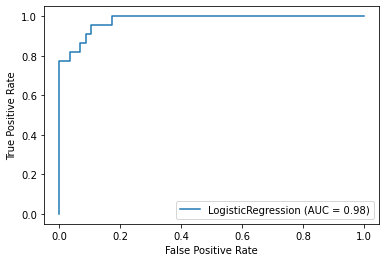

In [38]:
plot_roc_curve(classifier, X_test, y_test)

## <span style=color:green>Done modelling of Social_Network_Ads dataset by using LogisticRegression</span>